## Heatmaps

The goal of this notebook is to mention the importance of choosing an appropriate color palette. A heat map is a graphical representation of data where values are depicted by colors. Heatmaps allow you to easier spot where something happened and where it didn't. Consequently, what we choose for our color palette is important. Two types of color palettes are: 

1. Sequential: appropriate when data ranges from relatively low values to relatively high values. 
2. Qualitative: best when you want to distinguish discrete chunks of data that <b>do not have inherent ordering</b>.

![](images/heatmapColorPalette.png)

The data we will use is for a confusion matrix which is a table that is often used to describe the performance of a machine learning classification model. It can be used to tell you where the predictions went wrong. In the case of the images above, it is derived from predicting labels for digits from 0-9.

In [2]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import numpy as np
import pandas as pd

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

# import seaborn library (wrapper of matp__lotlib)
import seaborn as sns

### Load Data

The data is a confusion matrix which is a table that is often used to describe the performance of a machine learning classification model. It tells you where the predictions went wrong. 

This particular table is derived from predicting labels for digits from 0-9.

In [9]:
confusion = np.array([[37, 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [0, 39,  0,  0,  0,  0,  1,  0,  2,  1],
                      [0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
                      [0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
                      [0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
                      [0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
                      [0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
                      [0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
                      [0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
                      [0,  0,  0,  0,  0,  1,  0,  0,  2, 44]])
confusion

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 44]])

### Matplotlib
Unfortunately using Matplotlib involves quite a of code for heatmaps. It is worth mentioning that Matplotlib definitely has flaws. 

1. Matplotlib defaults are not ideal (no grid lines, white background etc).
2. The library is relatively low level. Doing anything complicated takes quite a bit of code. 
3. Not perfect integration with pandas data structures (though this is being improved).

(10.0, -1.0)

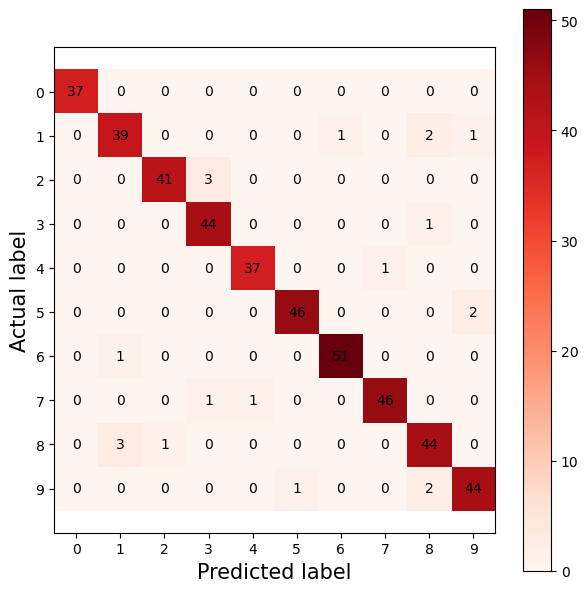

In [13]:
# this is a lot of code that is not trivial to create
plt.figure(figsize=(6,6))
plt.imshow(confusion, interpolation='nearest', cmap='Reds')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = confusion.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
        
## Using Knowledge Learned Online. Comment the 4 lines below out if you have issues. 
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Seaborn

Wrapper of matplotlib. One reason why you might want to plot using Seaborn is that it requires less syntax. Keep in mind that sometimes you will find it useful to use Matplotlib syntax to adjust the final plot output. In the case below, the Matplotlib syntax adds xlabels and ylabels. 

### Seaborn with Sequential Colormap

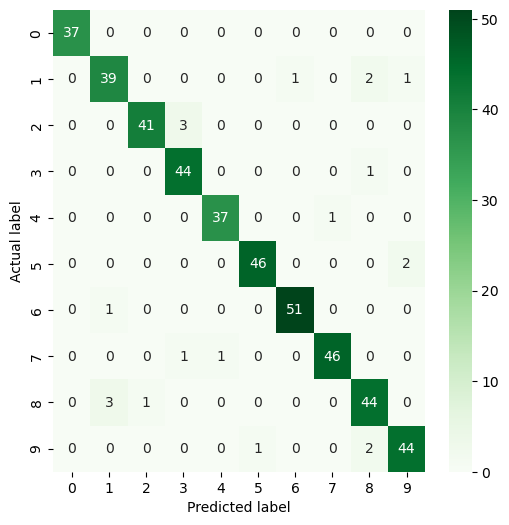

In [17]:
# sequential Sequential: appropriate when data ranges from relatively low
# (uninteresting values) to relatively high (interesting values). 
plt.figure(figsize=(6,6))
sns.heatmap(confusion, 
            annot=True,
            cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#### Debugging Top and Bottom Cut Off

For this particular graph and <b><u>version</b></u> of matplotlib/seaborn, notice how the top and bottom part of the graph is cutoff. By the time you take this class, it might not be a problem as these open source libraries are constantly being updated. I still enourage you to watch the video and see how to solve a problem so when one happens in the future whether it be with visualization or machine learning, you can better solve it. 

Google: seaborn heatmap top and bottom cut off
https://www.google.com/search?q=seaborn+heatmap+top+and+bottom+cut+off&oq=seaborn+heatmap+top+cut+&aqs=chrome.1.69i57j0.6781j0j7&sourceid=chrome&ie=UTF-8

MATLAB-style Solution: https://github.com/mwaskom/seaborn/issues/1773

Object Oriented Solution: https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

<b>MATLAB-style Fix </b>

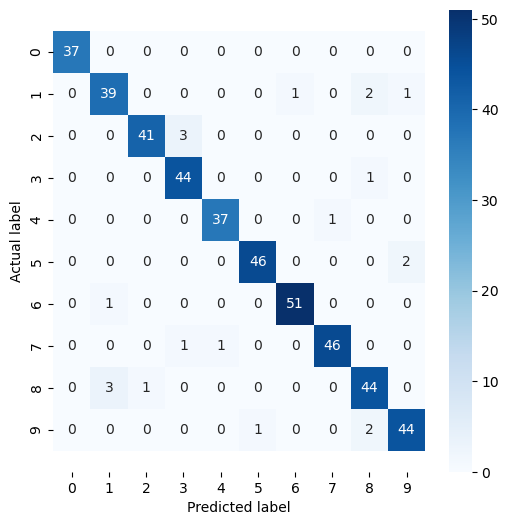

In [6]:
# sequential Sequential: appropriate when data ranges from relatively low
# (uninteresting values) to relatively high (interesting values). 
plt.figure(figsize=(6,6))
sns.heatmap(confusion, 
            annot=True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Using Knowledge Learned Online
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('images/sequentialHeatmap.png', dpi = 300)

<b>Object-oriented</b>

(10.5, -0.5)

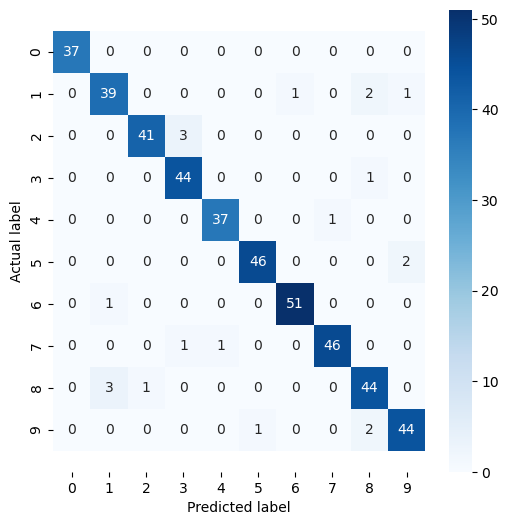

In [7]:
# sequential Sequential: appropriate when data ranges from relatively low
# (uninteresting values) to relatively high (interesting values). 
plt.figure(figsize=(6,6))
axes = sns.heatmap(confusion, 
            annot=True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Fix to make sure the top isn't cut off 
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)

### Seaborn with Qualitative Colormap
Qualitative colormaps are best when you want to distinguish discrete chunks of data that <b>do not have inherent ordering</b>. This may not be the best choice for this data.

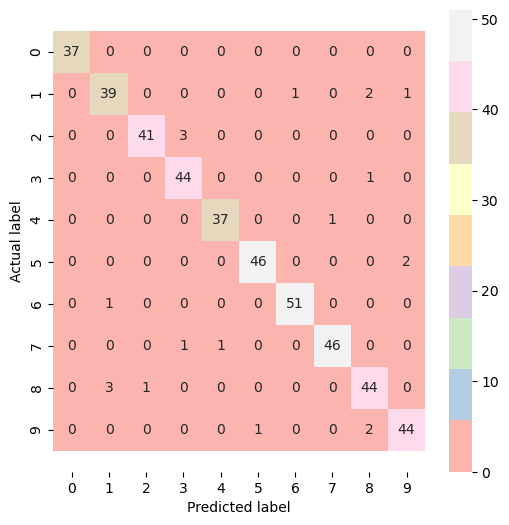

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion, 
            annot=True,
            cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Using Knowledge Learned Online
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('images/qualitativeHeatmap.png', dpi = 300)